In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
df=pd.read_csv("nasdaq100.csv",sep=";")

In [37]:
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [38]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [39]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [40]:
#df.drop("Date",axis=1)
df=df.drop(columns=['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [41]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 stock Prices')

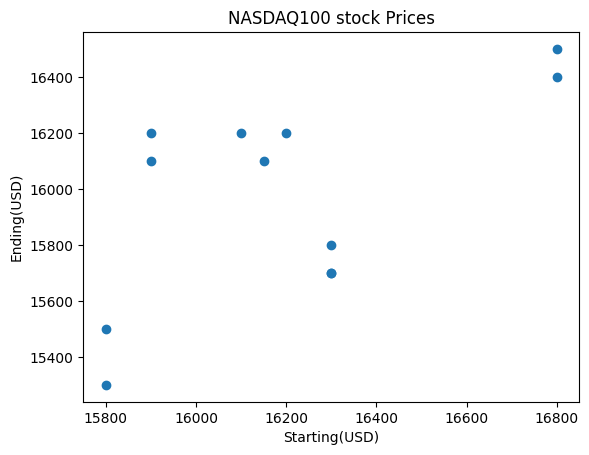

In [42]:
plt.scatter(df["Starting (USD)"],df["Ending (USD)"])
plt.xlabel("Starting(USD)")
plt.ylabel("Ending(USD)")
plt.title("NASDAQ100 stock Prices")

In [43]:
x=df.drop('Ending (USD)',axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [44]:
y=df['Ending (USD)']
y.head()

0    16500
1    16100
2    15300
3    16200
4    15700
Name: Ending (USD), dtype: int64

## Linear Regression


In [45]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [46]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [47]:
y.mean()

np.float64(15975.0)

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

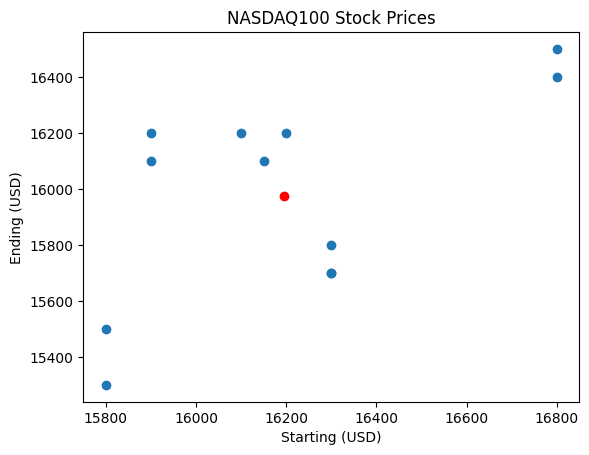

In [48]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [49]:
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
m=reg.coef_
m

array([0.65258293])

In [51]:
c=reg.intercept_
c

np.float64(5405.875557022609)

In [52]:
# y=mx+c
m*16700+c

array([16304.0105628])

In [53]:
reg.predict([[16700]])

c:\Users\Sultan Mahamud Opu\Desktop\Jupeter Note book\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16304.0105628])

In [54]:
df['Predicted_y']=reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


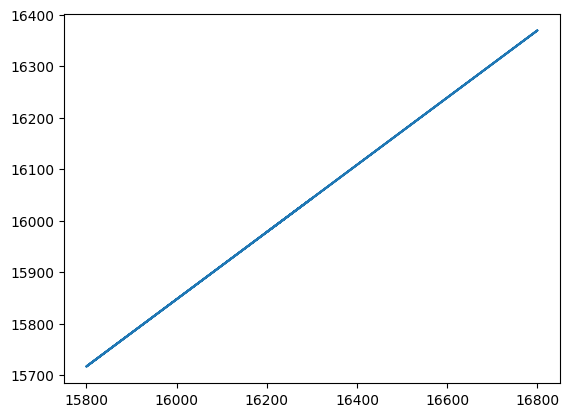

In [55]:
plt.plot(x,reg.predict(x))

Text(0.5, 1.0, 'NASDAQ100 Stock Prices with Predictions')

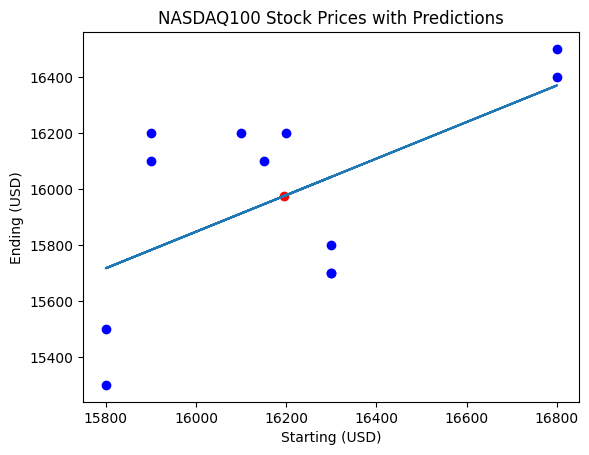

In [56]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='blue')
plt.xlabel('Starting (USD)')            
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices with Predictions')    

# Lose and Cost Function

In [57]:
df['lose']=df['Ending (USD)']-df['Predicted_y']
df.head()

,Starting (USD),Ending (USD),Predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


# MSE and MAE

In [58]:
#MSE and MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
mse=mean_squared_error(df['Ending (USD)'],df['Predicted_y'])
mse

80411.23397700385

In [60]:
mae=mean_absolute_error(df['Ending (USD)'],df['Predicted_y'])
mae

260.3840017604666

# Accuracy for Regression

In [63]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

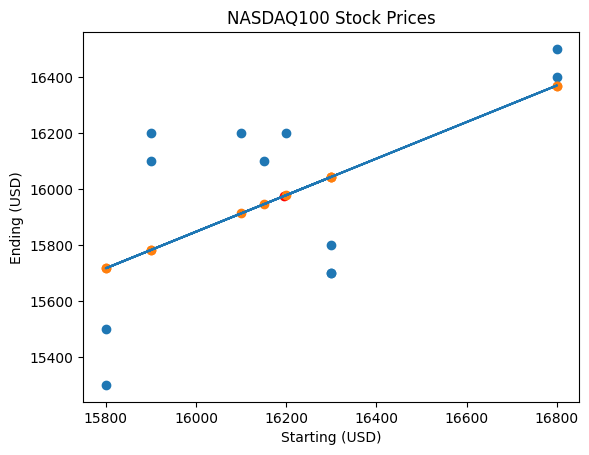

In [65]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(df['Starting (USD)'],reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

# R^2 value / Accuracy for regression

In [66]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.3577804940272571